In [1]:
import os.path as osp
import sys
from pathlib import Path
import matplotlib.pyplot as plt

root_path = Path(osp.abspath("")).parents[1]
sys.path.append(str(root_path))

%config InlineBackend.figure_format='retina'

In [2]:
import numpy as np
from papers.Zhao2023.algorithm import SmoothedPath
from core.curve import Line, Bezier

In [3]:
P = np.array(
    [[200, 100, 200], [100, 200, 200], [0, 200, 100], [0, 100, 0], [100, 0, 0], [200, 0, 100], [200, 100, 200]]
)

chord_error = 5
c1 = 0.5
smoothed_path = SmoothedPath(P, chord_error, c1)

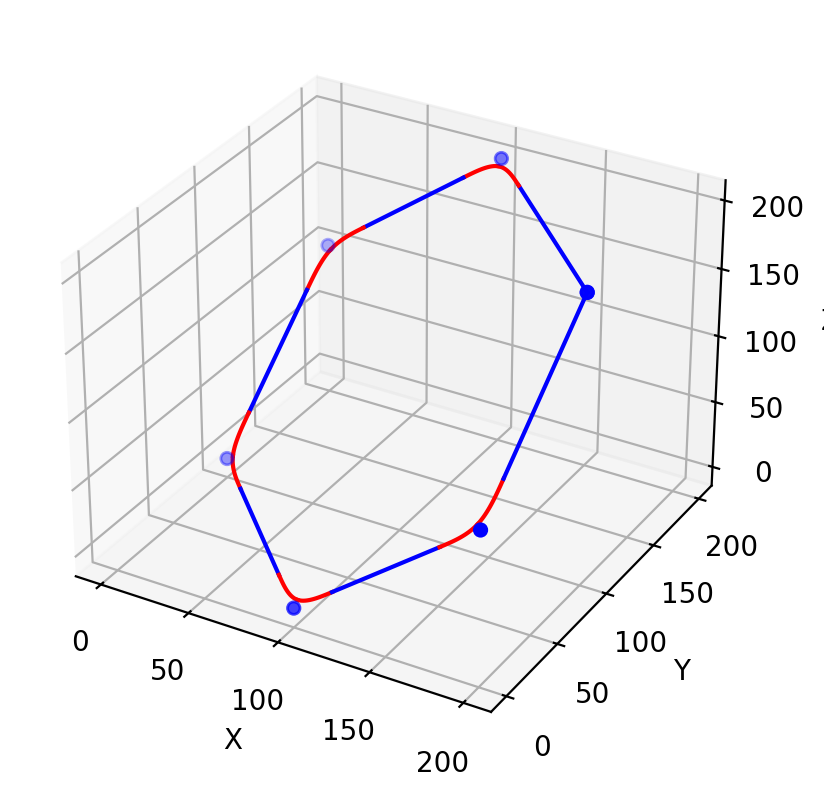

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.scatter(P[:, 0], P[:, 1], P[:, 2], c="b", marker="o", label="data points")
for block in smoothed_path.blocks:
    for curve in block.segments:
        pts = curve.get_points(20)
        c = "r" if isinstance(curve, Bezier) else "b"
        ax.plot(pts[:, 0], pts[:, 1], pts[:, 2], c=c)
plt.grid()
plt.show()

In [5]:
curr_len = 0
us = np.linspace(0, 1, 20)
L = []
K = []
for block in smoothed_path.blocks:
    for curve in block.segments:
        arc_lens = np.array([curve.get_length(u) for u in us]) + curr_len
        curvatures = curve.curvature(us)
        L.extend(arc_lens)
        K.extend(curvatures)
        curr_len += curve.length

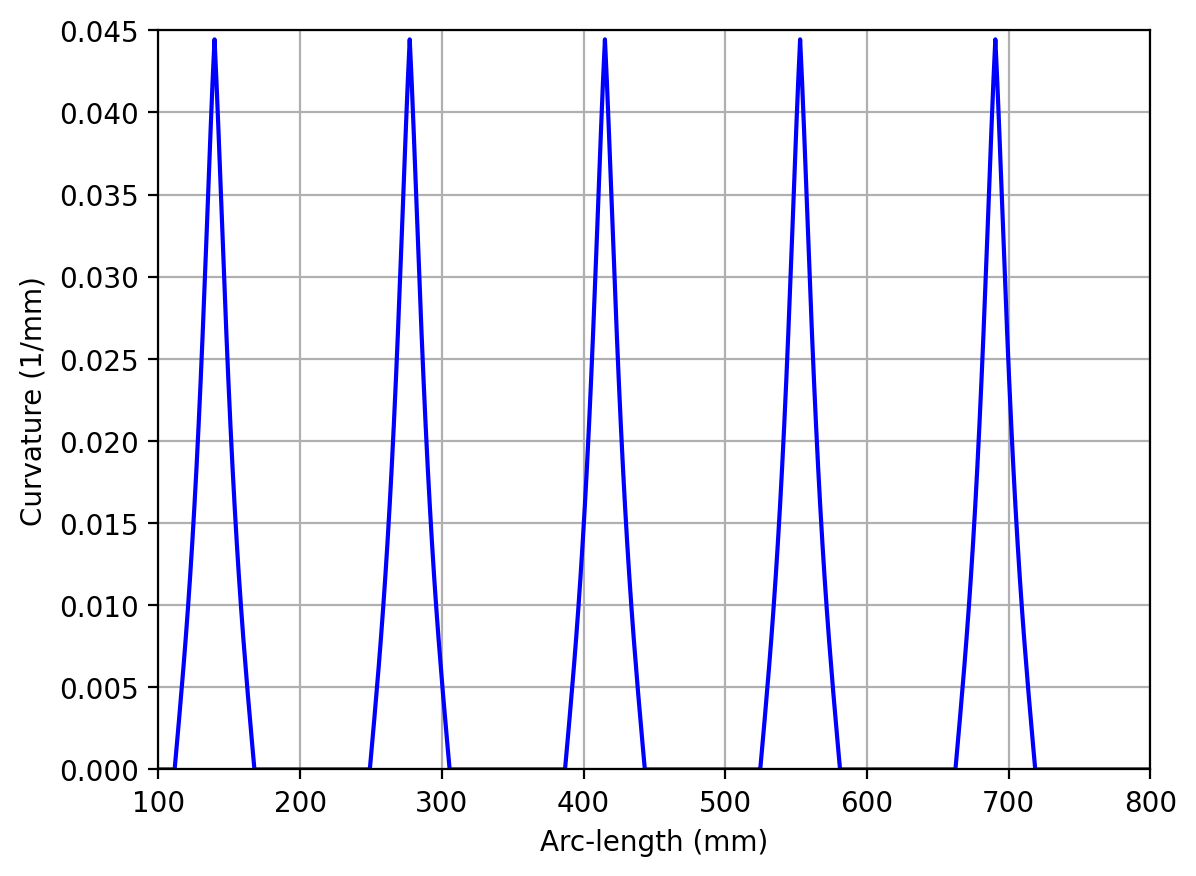

In [12]:
plt.plot(L, K, "b")  # 'b'表示蓝色线条
plt.grid()

# 设置x轴和y轴标签
plt.xlabel("Arc-length (mm)")
plt.ylabel("Curvature (1/mm)")

# 设置x轴和y轴的范围
plt.xlim(100, 800)
plt.ylim(0, 0.045)
plt.show()